In [1]:
from sklearn.datasets import load_iris
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
iris = load_iris()
X = iris.data
y = iris['target']

In [2]:
def k_means(X, K):
    n = X.shape[0]
    c = X.shape[1]
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    centroids = np.random.randn(K,c)*std + mean
    centroids_old = np.zeros(centroids.shape) 
    centroids_new = deepcopy(centroids) 
    clusters = np.zeros(n)
    distances = np.zeros((n,K))
    error = np.linalg.norm(centroids_new - centroids_old)
    while error != 0:
        for i in range(K):
            distances[:,i] = np.linalg.norm(X - centroids[i], axis=1)
            clusters = np.argmin(distances, axis = 1)
            centroids_old = deepcopy(centroids_new)
            for i in range(K):
                centroids_new[i] = np.mean(X[clusters == i], axis=0)
                error = np.linalg.norm(centroids_new - centroids_old)
            colors=['orange', 'blue', 'green']
            for i in range(n):
                plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(y[i])])
        plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='g', s=150)
    
    return clusters

C:\Users\deniz\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\deniz\Anaconda3\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0], dtype=int64)

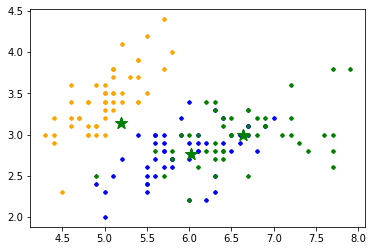

In [3]:
k_means(X, 3)